In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
movies = pd.read_csv('data/movies.csv')

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape

(9125, 3)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


In [7]:
movies.genres.unique()[:20]

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama'], dtype=object)

In [8]:
len(movies.genres.unique())

902

In [9]:
ratings = pd.read_csv('./data/ratings.csv')

In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [11]:
ratings.shape

(100004, 4)

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [13]:
ratings.rating.value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

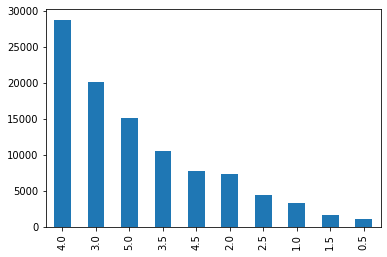

In [16]:
ratings.rating.value_counts().plot(kind='bar')
plt.show()

In [12]:
unique_rated_movies = ratings.movieId.unique()

In [13]:
type(unique_rated_movies)

numpy.ndarray

In [14]:
len(unique_rated_movies)

9066

In [15]:
tags = pd.read_csv('./data/tags.csv')

In [16]:
tags.shape

(1296, 4)

In [17]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [18]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
userId       1296 non-null int64
movieId      1296 non-null int64
tag          1296 non-null object
timestamp    1296 non-null int64
dtypes: int64(3), object(1)
memory usage: 40.6+ KB


In [19]:
links = pd.read_csv('./data/links.csv')

In [20]:
links.shape

(9125, 3)

In [21]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
imdbId     9125 non-null int64
tmdbId     9112 non-null float64
dtypes: float64(1), int64(2)
memory usage: 213.9 KB


In [23]:
user_ratings = pd.pivot_table(ratings, index='movieId', columns='userId', values='rating')

In [24]:
user_ratings.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
rating_665 = user_ratings[665]

In [26]:
rating_665.head()

movieId
1    NaN
2    3.0
3    3.0
4    NaN
5    3.0
Name: 665, dtype: float64

In [27]:
corr_665 = user_ratings.corrwith(rating_665)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [28]:
corr_665 = corr_665.sort_values(ascending=False)

In [29]:
corr_665.head()

userId
272    1.0
158    1.0
665    1.0
540    1.0
135    1.0
dtype: float64

In [30]:
corr_665.sort_values(ascending=True).head()

userId
482   -1.000000
403   -1.000000
331   -1.000000
301   -1.000000
490   -0.891902
dtype: float64

In [31]:
user_ratings[[665,272]].dropna()

userId,665,272
movieId,,
260,4.0,4.0
3793,4.0,4.0
4367,4.0,4.0
4993,5.0,5.0


In [32]:
# User ratings for movies not rated by user 665
movies_unrated = ratings[rating_665[ratings.movieId].isnull().values]
movies_unrated = movies_unrated.drop(['timestamp'],axis=1)
movies_unrated.head()

,userId,movieId,rating
0,1,31,2.5
3,1,1129,2.0
4,1,1172,4.0
5,1,1263,2.0
6,1,1287,2.0


In [33]:
movies_unrated['correlation'] = movies_unrated['userId'].map(corr_665.get)

In [34]:
movies_unrated.head()

,userId,movieId,rating,correlation
0,1,31,2.5,0.132453
3,1,1129,2.0,0.132453
4,1,1172,4.0,0.132453
5,1,1263,2.0,0.132453
6,1,1287,2.0,0.132453


In [35]:
movies_unrated['corr_rating'] = movies_unrated['rating'] * movies_unrated['correlation']

In [36]:
movies_unrated.head()

,userId,movieId,rating,correlation,corr_rating
0,1,31,2.5,0.132453,0.331133
3,1,1129,2.0,0.132453,0.264906
4,1,1172,4.0,0.132453,0.529813
5,1,1263,2.0,0.132453,0.264906
6,1,1287,2.0,0.132453,0.264906


In [37]:
recommendation = movies_unrated.groupby('movieId').apply(lambda r: r.corr_rating.sum()/r.corr_rating.count())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [38]:
recommendation.sort_values(ascending=False).head()

movieId
7002     4.008777
26701    3.395182
70344    3.301348
69529    3.044968
50703    2.969970
dtype: float64

In [39]:
recommendation.sort_values(ascending=True).head()

movieId
2650   -5.0
2649   -5.0
2647   -5.0
2636   -5.0
2637   -4.0
dtype: float64

In [40]:
user_ratings.loc[7002,:].dropna()

userId
186    4.5
Name: 7002, dtype: float64

In [41]:
user_ratings.loc[:,[186,665]].dropna()

userId,186,665
movieId,,
2571,5.0,5.0
2959,4.5,5.0
3578,4.0,5.0
3617,1.0,2.0
3996,3.5,4.0
4226,5.0,4.0
4238,2.5,3.0
4306,4.0,5.0
4639,1.5,3.0


In [42]:
user_ratings.loc[2650,:].dropna()

userId
482    5.0
Name: 2650, dtype: float64

In [43]:
user_ratings.loc[:,[482,665]].dropna()

userId,482,665
movieId,,
32,4.0,4.0
1210,4.0,4.0
1258,5.0,3.0
1721,5.0,3.0
2617,4.0,4.0
